In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


### read the data

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We had possibly the worse ch...
1,✅ Trip Verified | I flew to LHR from ATH in C...
2,✅ Trip Verified | I like the British Airways ...
3,✅ Trip Verified | I have come to boarding and...
4,✅ Trip Verified | Stinking nappies being chang...


In [4]:
df.to_csv("BA_reviews.csv")

In [5]:
reviews = pd.read_csv('BA_reviews.csv')
reviews = reviews.pop('reviews')
reviews

0      ✅ Trip Verified | We had possibly the worse ch...
1      ✅ Trip Verified |  I flew to LHR from ATH in C...
2      ✅ Trip Verified |  I like the British Airways ...
3      ✅ Trip Verified |  I have come to boarding and...
4      ✅ Trip Verified | Stinking nappies being chang...
                             ...                        
995    ✅ Trip Verified |  Chicago to London Heathrow....
996    ✅ Trip Verified |  London to Chicago. Could it...
997    ✅ Trip Verified |  Prague to London Heathrow. ...
998    ✅ Trip Verified |  London City to Florence. My...
999    ✅ Trip Verified |  London to Johannesburg. Sin...
Name: reviews, Length: 1000, dtype: object

# clean the data

In [6]:
import string 

In [7]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [8]:
reviews = reviews.str.replace('Trip Verified |', '')
reviews = reviews.str.replace('✅', '')
reviews = reviews.str.replace('|', '')
reviews = reviews.apply(remove_punctuations)
reviews

C:\Users\sarth\AppData\Local\Temp\ipykernel_10892\1899772924.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace('Trip Verified |', '')
C:\Users\sarth\AppData\Local\Temp\ipykernel_10892\1899772924.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews = reviews.str.replace('|', '')


0        We had possibly the worse checkin experience...
1         I flew to LHR from ATH in Club Europe with ...
2         I like the British Airways World Traveller ...
3         I have come to boarding and my cabin luggag...
4        Stinking nappies being changed in business c...
                             ...                        
995       Chicago to London Heathrow Club Class on Br...
996       London to Chicago Could it get any worse Th...
997       Prague to London Heathrow Very disappointin...
998       London City to Florence My flight was at ar...
999       London to Johannesburg Since the aircraft w...
Name: reviews, Length: 1000, dtype: object

In [9]:
reviews.shape

(1000,)

In [10]:
freq_words = pd.Series(' '.join(reviews).lower().split()).value_counts()[:50]
freq_words

the        7267
to         5302
and        4435
a          3244
was        3242
i          3033
in         2048
of         2004
flight     1899
on         1777
for        1732
not        1365
with       1364
my         1311
we         1279
that       1203
ba         1168
they       1147
it         1137
is         1133
were       1061
at         1032
had         959
but         919
this        893
have        851
no          808
as          756
service     728
from        724
me          668
our         593
very        589
an          554
so          553
london      535
be          531
you         527
time        508
are         491
there       454
seat        451
food        447
class       439
crew        438
british     434
airways     430
good        425
one         424
which       422
dtype: int64

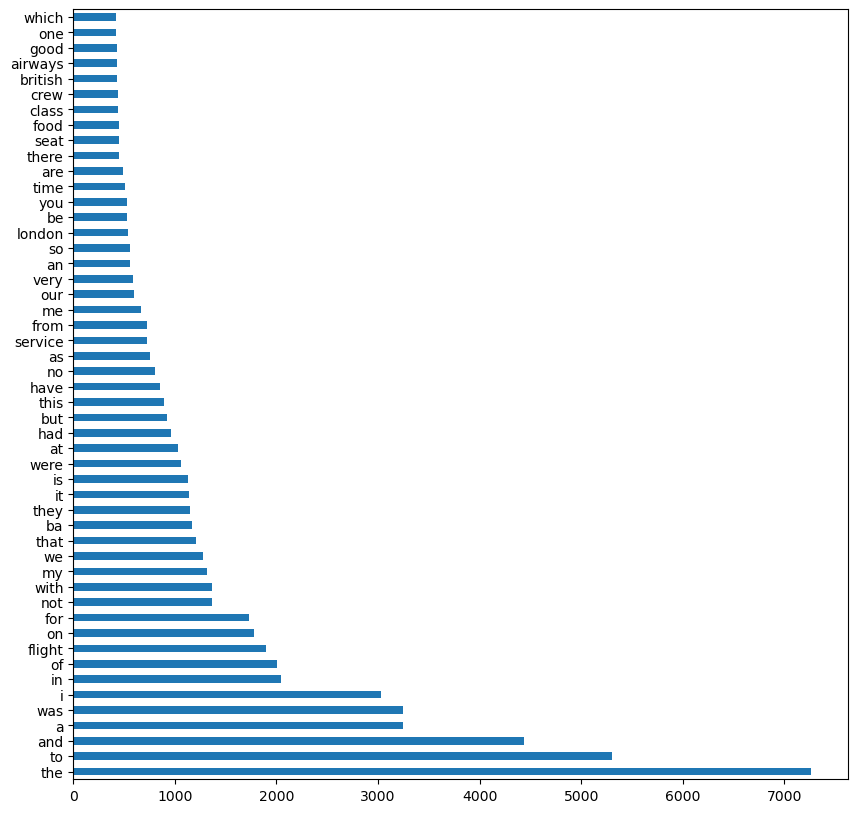

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0], y=freq_words[1])
plt.show()

### text clustring

In [12]:
categories = ['negative','positive']
num_cat = len(categories)
num_cat

2

In [13]:
import numpy as np
import seaborn as sns

In [14]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')
# Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                            stop_words='english',
                            ngram_range = (1,1),
                            tokenizer = tokenizer.tokenize)
# Fit and Transform Text Data
reviews_counts = tf_idf_vect.fit_transform(reviews)
# Check Shape of Count Vector
reviews_counts.shape

C:\Users\sarth\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(1000, 7754)

In [15]:
# Import KMeans Model
from sklearn.cluster import KMeans
# Create Kmeans object and fit it to the Training data
kmeans = KMeans(n_clusters=num_cat).fit(reviews_counts)
# Get the labels using KMeans
pred_labels = kmeans.labels_
pred_labels

C:\Users\sarth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [16]:
cluster_centres = kmeans.cluster_centers_
cluster_centres

array([[0.00059706, 0.        , 0.00059407, ..., 0.00140076, 0.        ,
        0.        ],
       [0.00024663, 0.00036667, 0.        , ..., 0.00117348, 0.00015689,
        0.00015689]])

In [19]:
unique, counts = np.unique(pred_labels, return_counts=True)
dict(zip(unique, counts))

{0: 582, 1: 418}

In [25]:
from sklearn import metrics

# Compute DBI score
dbi = metrics.davies_bouldin_score(reviews_counts.toarray(), pred_labels)

# compute silhoutte score
ss = metrics.silhouette_score(reviews_counts.toarray(), pred_labels, metrics='euclidean')

# print the DBI and silhoutte Scores
print("DBI Score: ", dbi, "/nSilhoutte Score: ", ss)

TypeError: euclidean_distances() got an unexpected keyword argument 'metrics'

In [21]:
df_reviews = pd.DataFrame({'review': reviews, 'label': pred_labels})
df_reviews

,review,label
0,We had possibly the worse checkin experience...,0
1,I flew to LHR from ATH in Club Europe with ...,0
2,I like the British Airways World Traveller ...,0
3,I have come to boarding and my cabin luggag...,1
4,Stinking nappies being changed in business c...,0
...,...,...
995,Chicago to London Heathrow Club Class on Br...,0
996,London to Chicago Could it get any worse Th...,0
997,Prague to London Heathrow Very disappointin...,0
998,London City to Florence My flight was at ar...,1


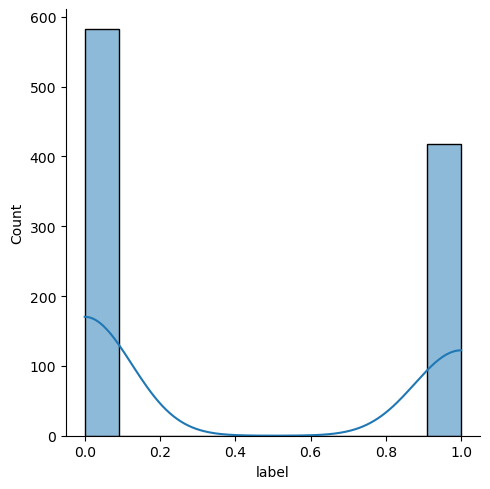

In [29]:
sns.displot(df_reviews['label'], kde=True)

In [27]:
negative_reviews = df_reviews[df_reviews['label']==0]
negative_reviews

,review,label
0,We had possibly the worse checkin experience...,0
1,I flew to LHR from ATH in Club Europe with ...,0
2,I like the British Airways World Traveller ...,0
4,Stinking nappies being changed in business c...,0
6,BA 246 21JAN 2023 Did not appreciate the un...,0
...,...,...
994,New York to Venice via London Staff have be...,0
995,Chicago to London Heathrow Club Class on Br...,0
996,London to Chicago Could it get any worse Th...,0
997,Prague to London Heathrow Very disappointin...,0


In [28]:
positive_reviews = df_reviews[df_reviews['label']==1]
positive_reviews

,review,label
3,I have come to boarding and my cabin luggag...,1
5,Worst service ever Lost baggage because of d...,1
9,Not Verified I just want to warn everyone of...,1
11,The plane was extremely dirty with chocolat...,1
12,Not Verified Overall journey wasn’t bad howev...,1
...,...,...
981,London to Phoenix BA289 yesterday The plane...,1
982,San Francisco to London After paying £4000 ...,1
985,Tampa to Gatwick I paid to have my seats bu...,1
991,Gatwick to Mauritius My wife and 2 friends ...,1
